# MODELING

## Exercises
Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

# module for visualizations
import viz_kmeans as vk

# my imports
import wrangle_original as wo

### 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.
    b. Visualize the results of your clustering.
    c. Use the elbow method to visually select a good value for k.

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
tr, val, ts = wo.get_split(df)
tr.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
87,6.7,3.1,4.7,1.5,versicolor
83,5.8,2.7,3.9,1.2,versicolor
110,7.2,3.6,6.1,2.5,virginica
148,6.5,3.0,5.2,2.0,virginica
50,5.0,3.3,1.4,0.2,setosa


In [4]:
new_col_name = []

for col in tr.columns:
    new_col_name.append(col.lower().replace('.', '_'))

tr.columns = new_col_name

tr.head()

,sepal_length,sepal_width,petal_length,petal_width,species
87,6.7,3.1,4.7,1.5,versicolor
83,5.8,2.7,3.9,1.2,versicolor
110,7.2,3.6,6.1,2.5,virginica
148,6.5,3.0,5.2,2.0,virginica
50,5.0,3.3,1.4,0.2,setosa


In [5]:
# define independent variables for k-means

Xtr = tr[['petal_width', 'sepal_width']]
Xtr.head()

,petal_width,sepal_width
87,1.5,3.1
83,1.2,2.7
110,2.5,3.6
148,2.0,3.0
50,0.2,3.3


### Create and fit cluster model

In [6]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(Xtr)

# USE (predict using) the thing 
kmeans.predict(Xtr)

array([0, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2,
       0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       1, 2], dtype=int32)

In [7]:
# make a new column names cluster in iris and Xtr dataframe

tr['cluster'] = kmeans.predict(Xtr)

Xtr['cluster'] = kmeans.predict(Xtr)

tr.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
87,6.7,3.1,4.7,1.5,versicolor,0
83,5.8,2.7,3.9,1.2,versicolor,0
110,7.2,3.6,6.1,2.5,virginica,2


In [8]:
tr.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.011111,3.392593,1.477778,0.259259,0.962963
versicolor,5.947059,2.791176,4.235294,1.323529,0.176471
virginica,6.551724,2.975862,5.558621,2.017241,1.724138


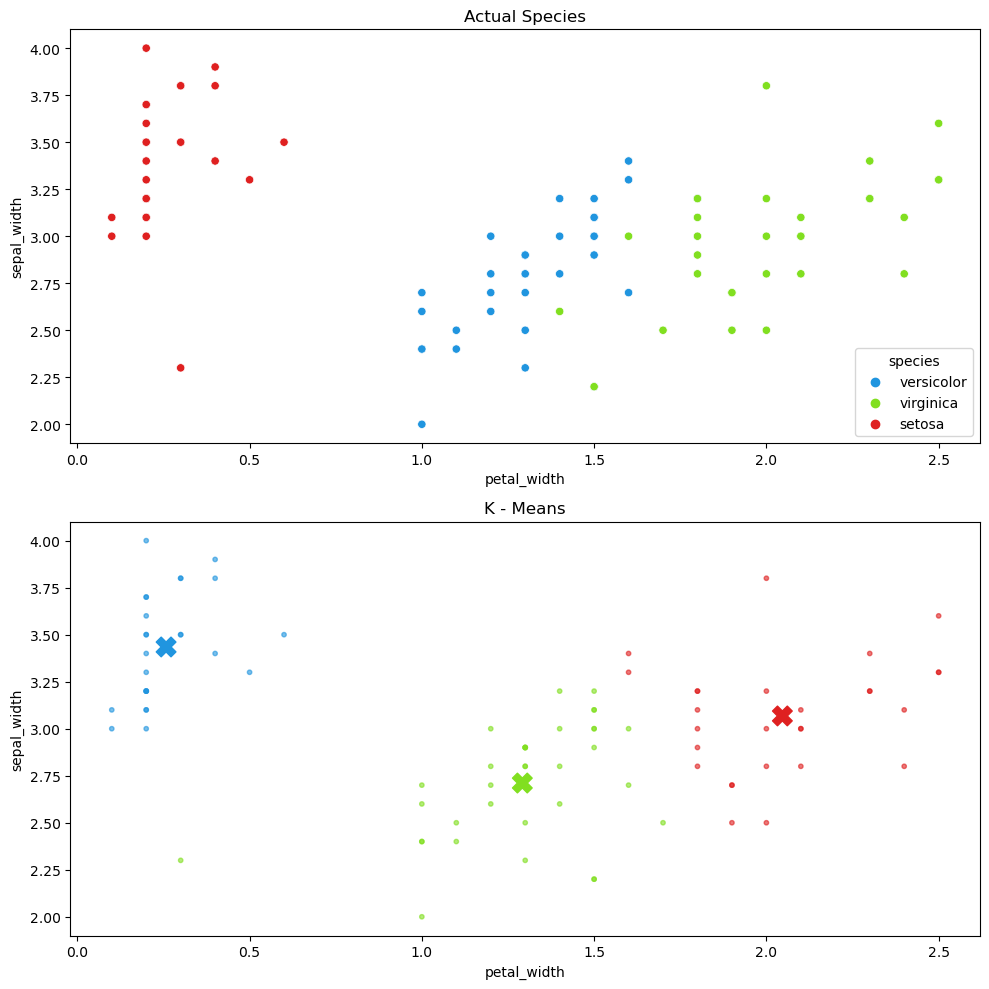

In [9]:
# Visualize the scatter plot for Actual vs predicted (K-Means)
vk.viz_iris(tr)

In [10]:
kmeans.inertia_

12.396077533577532

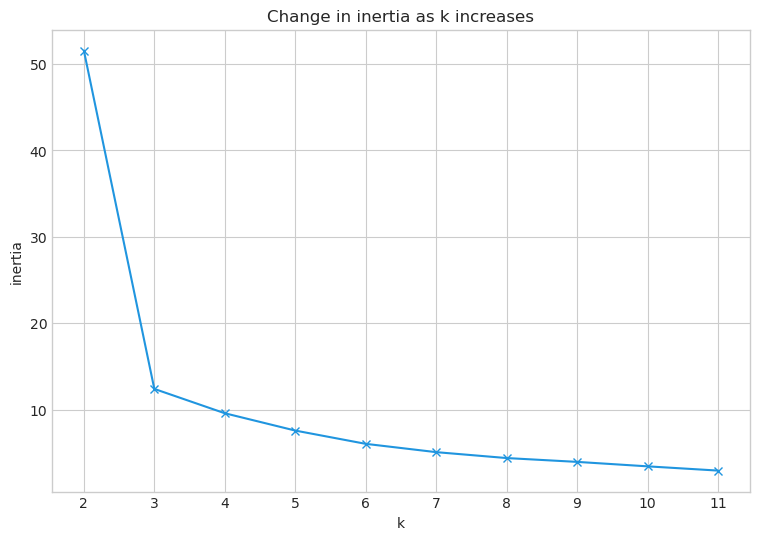

In [11]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(Xtr).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

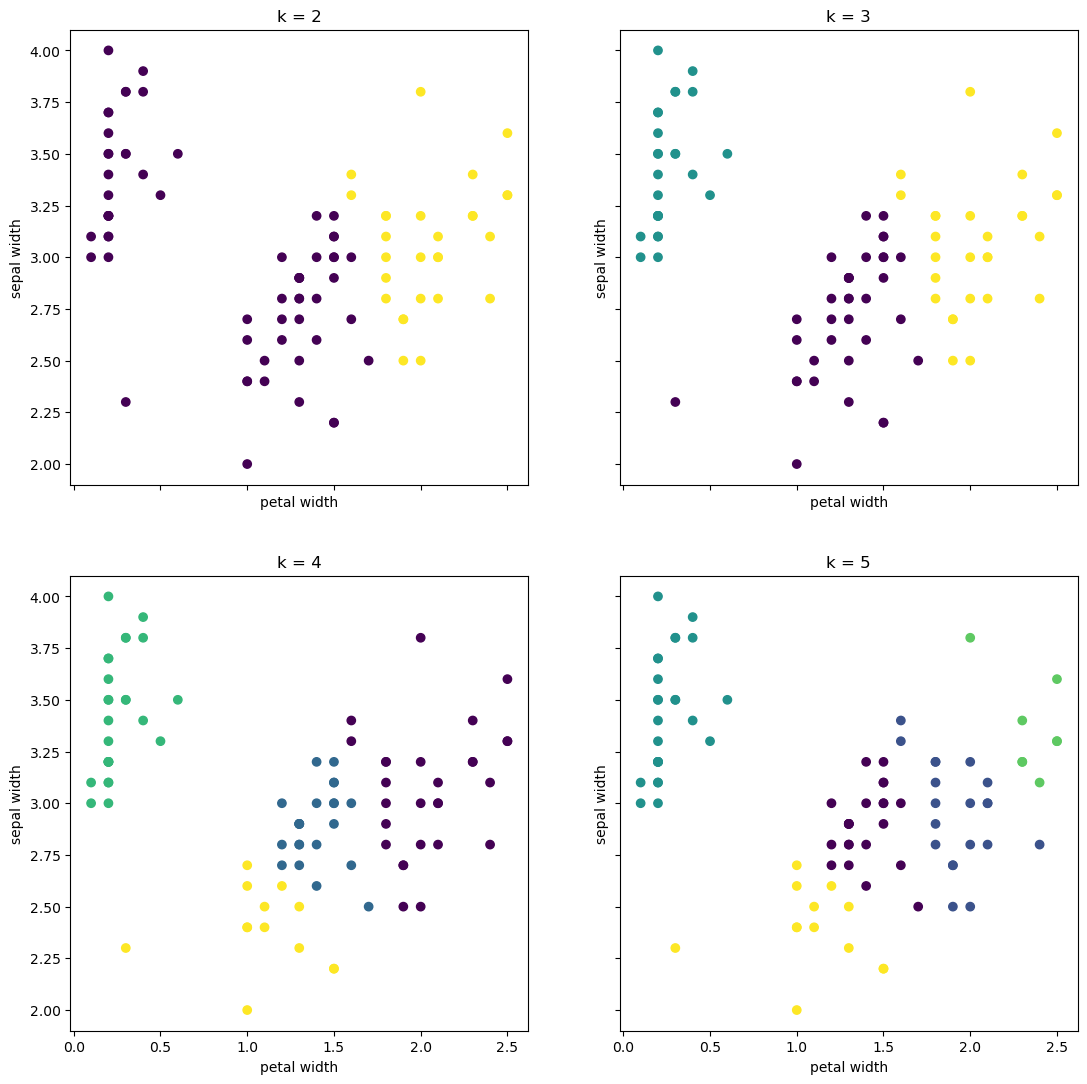

In [12]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(Xtr).predict(Xtr)
    
    ax.scatter(Xtr.petal_width, Xtr.sepal_width, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='sepal width')

###  d. Repeat the clustering, this time with 3 different features.

In [13]:
# define independent variables for k-means
tr_3 = tr.copy()
Xtr_3 = tr_3[['petal_width', 'sepal_width','sepal_length']]
Xtr_3.head()

,petal_width,sepal_width,sepal_length
87,1.5,3.1,6.7
83,1.2,2.7,5.8
110,2.5,3.6,7.2
148,2.0,3.0,6.5
50,0.2,3.3,5.0


In [14]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(Xtr_3)

# USE (predict using) the thing 
kmeans.predict(Xtr_3)

array([2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1, 0,
       1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1,
       2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       0, 1], dtype=int32)

In [15]:
# make a new column names cluster in iris and X dataframe

tr_3['cluster'] = kmeans.predict(Xtr_3)

Xtr_3['cluster'] = kmeans.predict(Xtr_3)

tr_3.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
87,6.7,3.1,4.7,1.5,versicolor,2
83,5.8,2.7,3.9,1.2,versicolor,1
110,7.2,3.6,6.1,2.5,virginica,2


In [16]:
tr_3.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.011111,3.392593,1.477778,0.259259,0.000000
versicolor,5.947059,2.791176,4.235294,1.323529,1.235294
virginica,6.551724,2.975862,5.558621,2.017241,1.655172


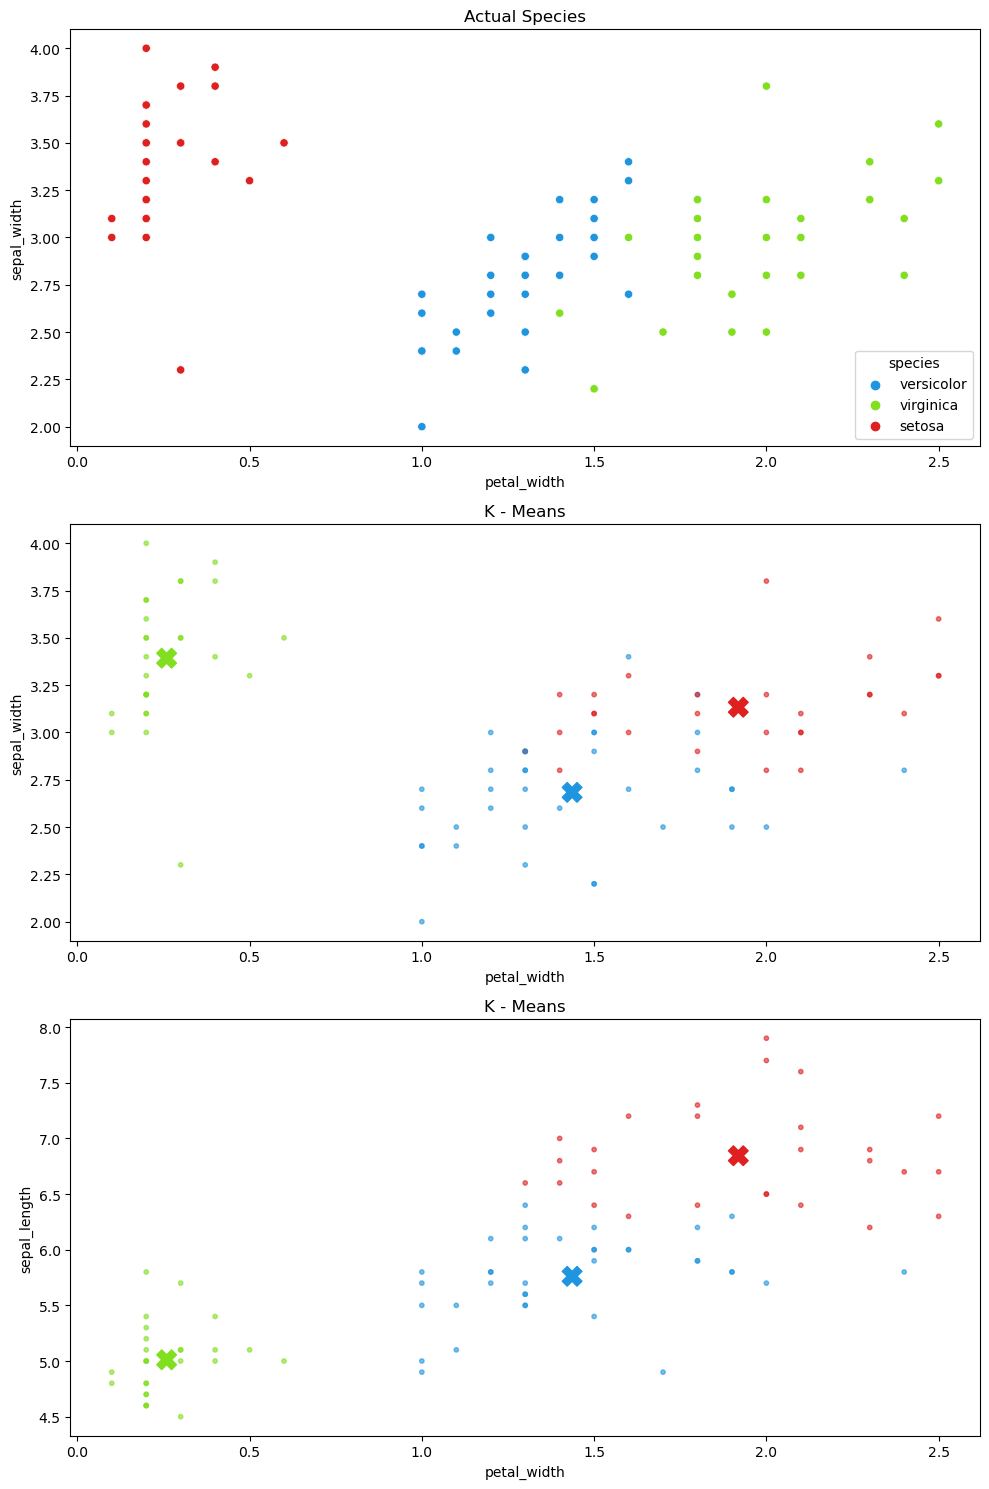

In [17]:
# # Visualize the scatter plot for Actual vs predicted (K-Means)
#     # Get centroids' coordinates
#     centroids = np.array(iris.groupby('cluster')['petal_width', 'sepal_width','sepal_length'].mean())
#     cen_x = [i[0] for i in centroids]
#     cen_y = [i[1] for i in centroids]

#     # Add centroids' coordinates into new columns in local df
#     iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
#     iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

#     # Creates new column in local df to map distinct cluster colors
#     colors = ['#81DF20' ,'#2095DF','#DF2020']
#     iris['c'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

#     #specify custom palette for sns scatterplot
#     colors1 = ['#2095DF','#81DF20' ,'#DF2020']
#     customPalette = sns.set_palette(sns.color_palette(colors1))

#     # Plot the scatterplots

#     #Define figure (num of rows, columns and size)
#     fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

#     # plot ax1 
#     ax1 = plt.subplot(2,1,1) 
#     sns.scatterplot(data = iris, x = 'petal_width', y = 'sepal_width', ax = ax1, hue = 'species', palette=customPalette)
#     plt.title('Actual Species')

#     #plot ax2
#     ax2 = plt.subplot(2,1,2) 
#     ax2.scatter(iris.petal_width, iris.sepal_width, c=iris.c, alpha = 0.6, s=10)
#     ax2.set(xlabel = 'petal_width', ylabel = 'sepal_width', title = 'K - Means')

#     # plot centroids on  ax2
#     ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
#     iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
#     plt.tight_layout()
#     plt.show()
    
    
    
    
# Visualize the scatter plot for Actual vs predicted (K-Means)
# Get centroids' coordinates
centroids = np.array(tr_3.groupby('cluster')['petal_width', 'sepal_width', 'sepal_length'].mean())
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

# Add centroids' coordinates into new columns in local df
tr_3['cen_x'] = tr_3.cluster.map({0: cen_x[0], 1: cen_x[1], 2: cen_x[2]})
tr_3['cen_y'] = tr_3.cluster.map({0: cen_y[0], 1: cen_y[1], 2: cen_y[2]})

# Creates new column in local df to map distinct cluster colors
colors = ['#81DF20', '#2095DF', '#DF2020']
tr_3['c'] = tr_3.cluster.map({0: colors[0], 1: colors[1], 2: colors[2]})

# Specify custom palette for sns scatterplot
colors1 = ['#2095DF', '#81DF20', '#DF2020']
customPalette = sns.set_palette(sns.color_palette(colors1))

# Plot the scatterplots

# Define figure (num of rows, columns and size)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot ax1
ax1 = plt.subplot(3, 1, 1)
sns.scatterplot(data=tr_3, x='petal_width', y='sepal_width', ax=ax1, hue='species', palette=customPalette)
plt.title('Actual Species')

# Plot ax2
ax2 = plt.subplot(3, 1, 2)
ax2.scatter(tr_3.petal_width, tr_3.sepal_width, c=tr_3.c, alpha=0.6, s=10)
ax2.set(xlabel='petal_width', ylabel='sepal_width', title='K - Means')

# Plot centroids on ax2
ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)

# Plot ax3
ax3 = plt.subplot(3, 1, 3)
ax3.scatter(tr_3.petal_width, tr_3.sepal_length, c=tr_3.c, alpha=0.6, s=10)
ax3.set(xlabel='petal_width', ylabel='sepal_length', title='K - Means')

# Plot centroids on ax3
ax3.scatter(cen_x, tr_3.groupby('cluster')['sepal_length'].mean(), marker='X', c=colors, s=200)

# Remove the added columns
tr_3.drop(columns=['cen_x', 'cen_y', 'c'], inplace=True)

plt.tight_layout()
plt.show()

In [18]:
# kmeans.inertia_

inertia_list_3f = []

for k in range(2, 13):
    kmeans = KMeans(k)
    kmeans.fit(Xtr)
    inertia_list_3f.append(kmeans.inertia_)

inertia_list_3f

[51.53539170506913,
 12.396077533577532,
 9.580513616817965,
 7.576049331103679,
 6.019694019748368,
 5.093260869565217,
 4.375843695777906,
 3.8568670634920625,
 3.380105604921395,
 2.939130036630037,
 2.588928571428571]

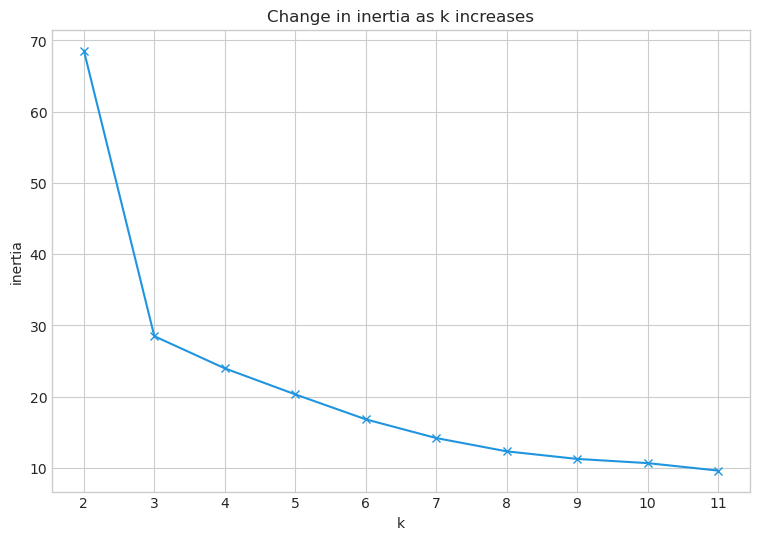

In [19]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(Xtr_3).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

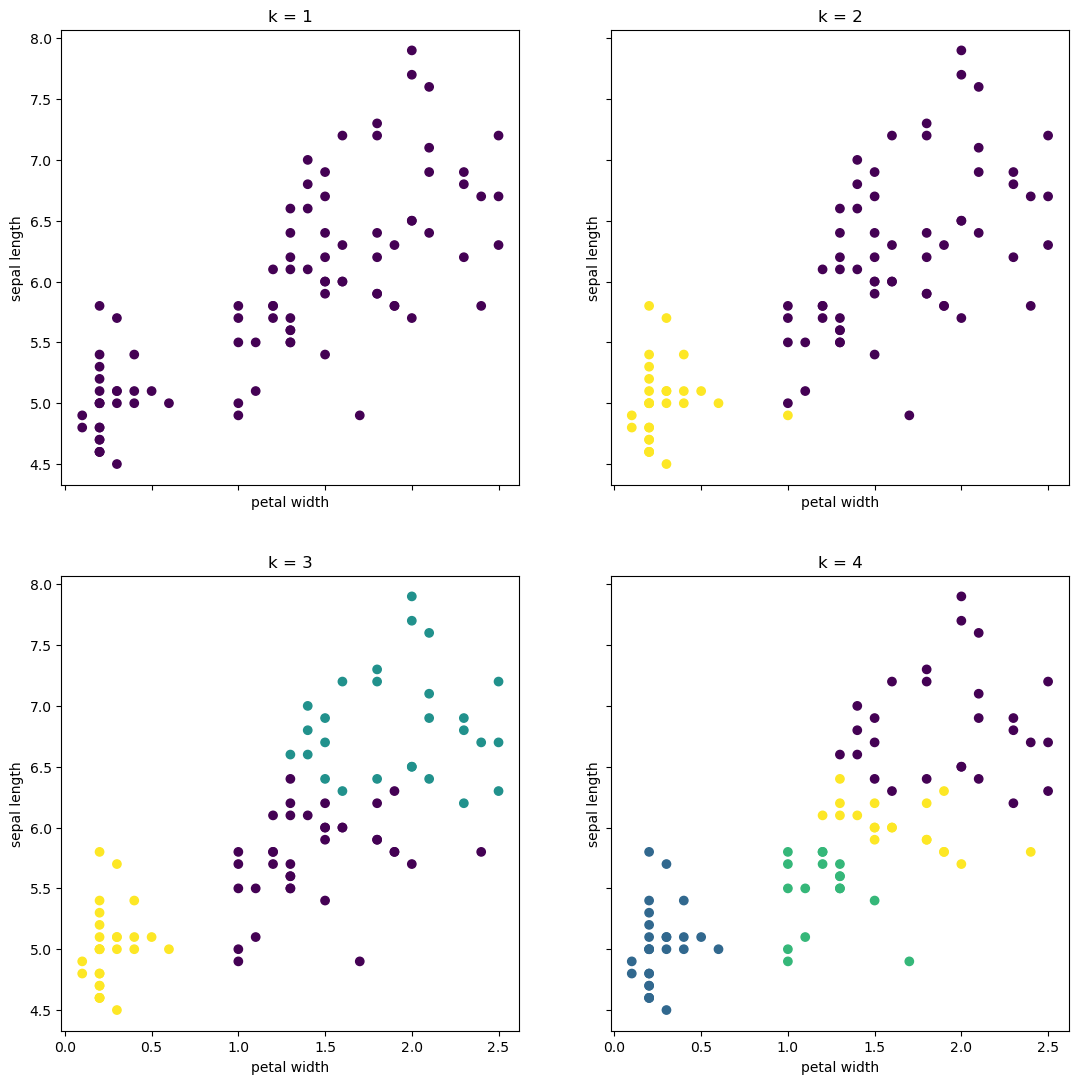

In [20]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(1, 5)):
    clusters = KMeans(k).fit(Xtr_3).predict(Xtr_3)
    ax.scatter(Xtr_3.petal_width, Xtr_3.sepal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='sepal length')

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [21]:
mall_df = wo.get_mallcustomer_data()
mall_df

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [22]:
# get dummies and concat to the dataframe
dummy_tips = pd.get_dummies(mall_df[['gender']], dummy_na=False, drop_first=[True, True])
mall_df = pd.concat([mall_df, dummy_tips], axis=1)

# # after getting the dummies drop the county column
# mall_df = mall_df.drop(columns =['gender'])

In [23]:
mall_df

,gender,age,annual_income,spending_score,gender_Male
customer_id,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0
...,...,...,...,...,...
196,Female,35,120,79,0
197,Female,45,126,28,0
198,Male,32,126,74,1


In [24]:
tr_m, val_m, ts_m = wo.get_split(mall_df)

In [37]:
# define independent variables for k-means
mall_df_X = tr_m[['annual_income','age']]
mall_df_X.head()

,annual_income,age
customer_id,,
64,47,54
49,40,29
25,28,54
137,73,44
177,88,58


In [38]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(mall_df_X)

# USE (predict using) the thing 
kmeans.predict(mall_df_X)

array([1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 1,
       0, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0,
       2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 2], dtype=int32)

In [39]:
# make a new column names cluster in iris and X dataframe

tr_m['cluster'] = kmeans.predict(mall_df_X)

mall_df_X['cluster'] = kmeans.predict(mall_df_X)

tr_m.head(3)

,gender,age,annual_income,spending_score,gender_Male,cluster
customer_id,,,,,,
64,Female,54,47,59,0,1
49,Female,29,40,42,0,2
25,Female,54,28,14,0,1


In [40]:
tr_m.groupby('gender').mean()

,age,annual_income,spending_score,gender_Male,cluster
gender,,,,,
Female,37.783784,59.932432,50.391892,0.0,0.797297
Male,40.695652,60.543478,51.500000,1.0,0.760870


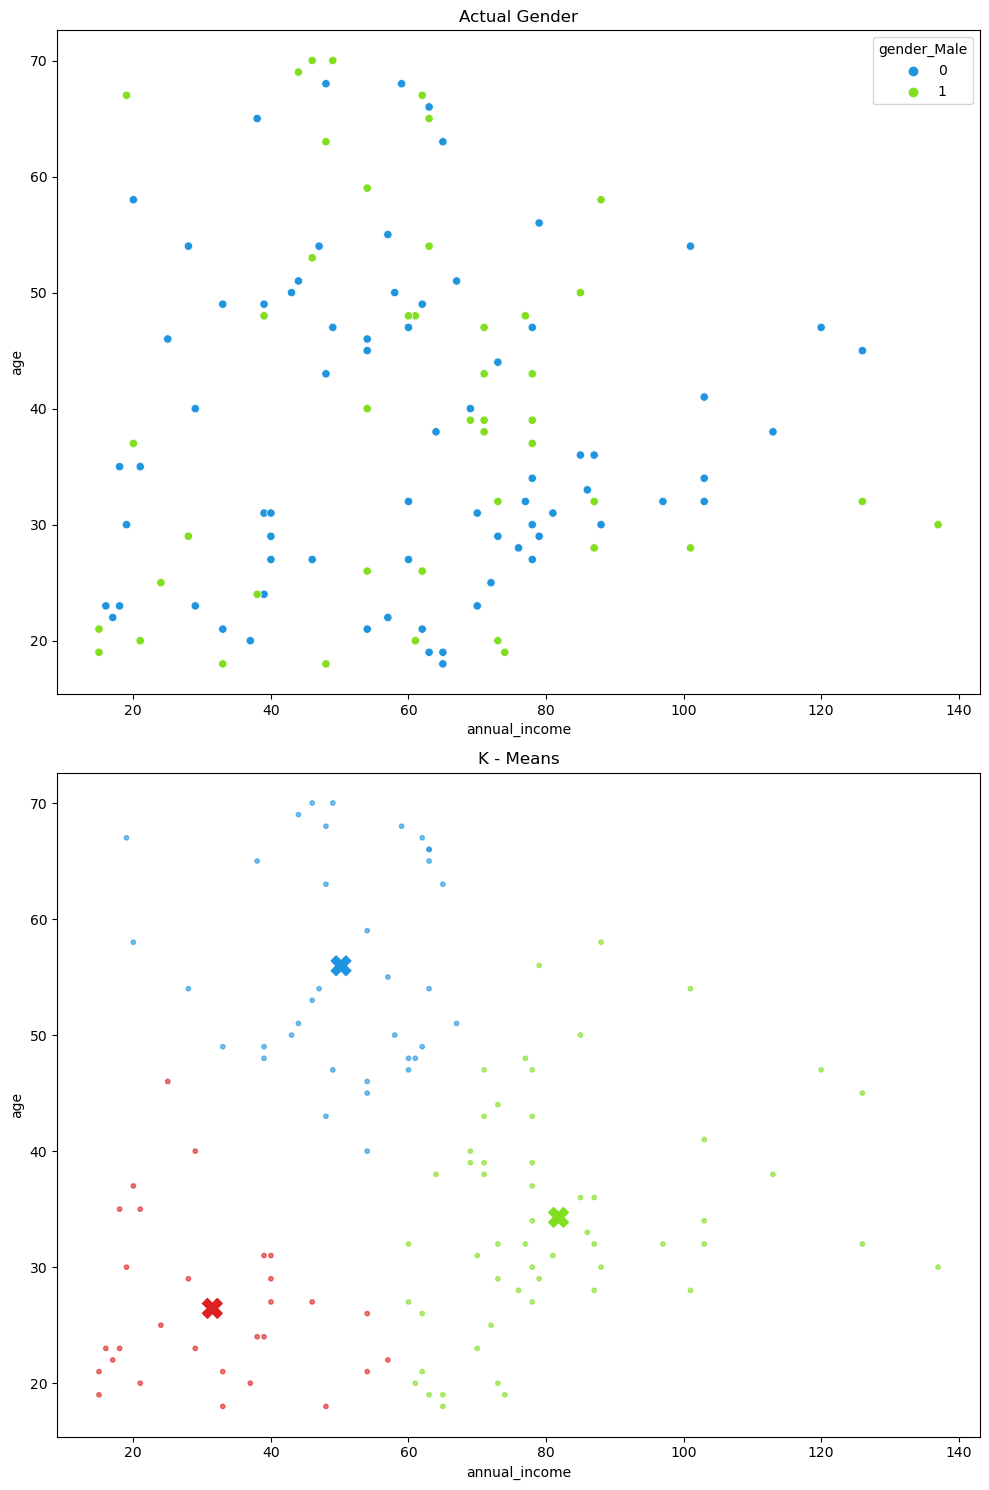

In [41]:
# # Visualize the scatter plot for Actual vs predicted (K-Means)
#     # Get centroids' coordinates
#     centroids = np.array(iris.groupby('cluster')['petal_width', 'sepal_width','sepal_length'].mean())
#     cen_x = [i[0] for i in centroids]
#     cen_y = [i[1] for i in centroids]

#     # Add centroids' coordinates into new columns in local df
#     iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
#     iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

#     # Creates new column in local df to map distinct cluster colors
#     colors = ['#81DF20' ,'#2095DF','#DF2020']
#     iris['c'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

#     #specify custom palette for sns scatterplot
#     colors1 = ['#2095DF','#81DF20' ,'#DF2020']
#     customPalette = sns.set_palette(sns.color_palette(colors1))

#     # Plot the scatterplots

#     #Define figure (num of rows, columns and size)
#     fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

#     # plot ax1 
#     ax1 = plt.subplot(2,1,1) 
#     sns.scatterplot(data = iris, x = 'petal_width', y = 'sepal_width', ax = ax1, hue = 'species', palette=customPalette)
#     plt.title('Actual Species')

#     #plot ax2
#     ax2 = plt.subplot(2,1,2) 
#     ax2.scatter(iris.petal_width, iris.sepal_width, c=iris.c, alpha = 0.6, s=10)
#     ax2.set(xlabel = 'petal_width', ylabel = 'sepal_width', title = 'K - Means')

#     # plot centroids on  ax2
#     ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
#     iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
#     plt.tight_layout()
#     plt.show()
    
    
    
    
# Visualize the scatter plot for Actual vs predicted (K-Means)
# Get centroids' coordinates
centroids = np.array(tr_m.groupby('cluster')['annual_income', 'age'].mean())
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

# Add centroids' coordinates into new columns in local df
tr_m['cen_x'] = tr_m.cluster.map({0: cen_x[0], 1: cen_x[1], 2: cen_x[2]})
tr_m['cen_y'] = tr_m.cluster.map({0: cen_y[0], 1: cen_y[1], 2: cen_y[2]})

# Creates new column in local df to map distinct cluster colors
colors = ['#81DF20', '#2095DF', '#DF2020']
tr_m['c'] = tr_m.cluster.map({0: colors[0], 1: colors[1], 2: colors[2]})

# Specify custom palette for sns scatterplot
colors1 = ['#2095DF', '#81DF20', '#DF2020']
customPalette = sns.set_palette(sns.color_palette(colors1))

# Plot the scatterplots

# Define figure (num of rows, columns and size)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot ax1
ax1 = plt.subplot(2, 1, 1)
sns.scatterplot(data=tr_m, x='annual_income', y='age', ax=ax1, hue='gender_Male', palette=customPalette)
plt.title('Actual Gender')

# Plot ax2
ax2 = plt.subplot(2, 1, 2)
ax2.scatter(tr_m.annual_income, tr_m.age, c=tr_m.c, alpha=0.6, s=10)
ax2.set(xlabel='annual_income', ylabel='age', title='K - Means')

# Plot centroids on ax2
ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)

# # Plot ax3
# ax3 = plt.subplot(3, 1, 3)
# ax3.scatter(tr_m.annual_income, tr_m.spending_score, c=tr_m.c, alpha=0.6, s=10)
# ax3.set(xlabel='annual_income', ylabel='spending_score', title='K - Means')

# # Plot centroids on ax3
# ax3.scatter(cen_x, tr_m.groupby('cluster')['spending_score'].mean(), marker='X', c=colors, s=200)

# Remove the added columns
tr_m.drop(columns=['cen_x', 'cen_y', 'c'], inplace=True)

plt.tight_layout()
plt.show()

In [30]:
kmeans.inertia_

63127.613306982865

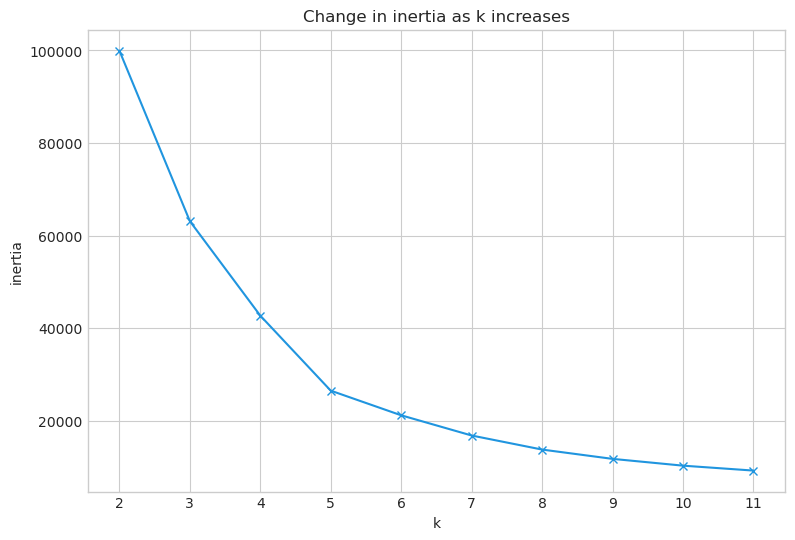

In [31]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(mall_df_X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

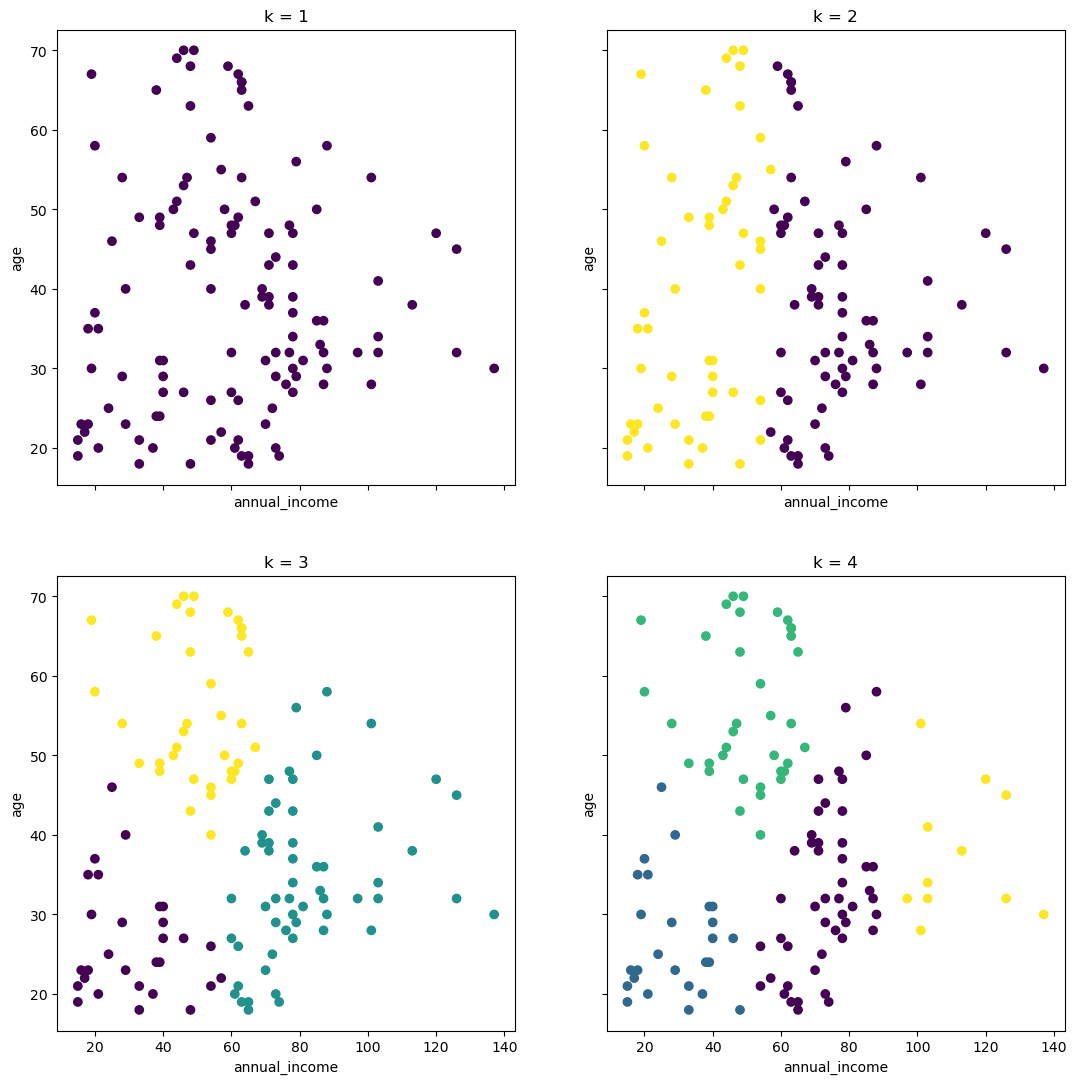

In [42]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(1, 5)):
    clusters = KMeans(k).fit(mall_df_X).predict(mall_df_X)
    ax.scatter(tr_m.annual_income, tr_m.age, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual_income', ylabel='age')

### 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [33]:
tr_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 64 to 23
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          120 non-null    object
 1   age             120 non-null    int64 
 2   annual_income   120 non-null    int64 
 3   spending_score  120 non-null    int64 
 4   gender_Male     120 non-null    uint8 
 5   cluster         120 non-null    int32 
dtypes: int32(1), int64(3), object(1), uint8(1)
memory usage: 5.3+ KB


In [ ]:
# define independent variables for k-means
df_3 = df.copy()
Xtr_3 = df_3[['petal_width', 'sepal_width','sepal_length']]
Xtr_3.head()

In [ ]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(Xtr_3)

# USE (predict using) the thing 
kmeans.predict(Xtr_3)

In [ ]:
# make a new column names cluster in iris and X dataframe

df_3['cluster'] = kmeans.predict(Xtr_3)

Xtr_3['cluster'] = kmeans.predict(Xtr_3)

df_3.head(3)

In [ ]:
df_3.groupby('species').mean()

In [ ]:
# # Visualize the scatter plot for Actual vs predicted (K-Means)
#     # Get centroids' coordinates
#     centroids = np.array(iris.groupby('cluster')['petal_width', 'sepal_width','sepal_length'].mean())
#     cen_x = [i[0] for i in centroids]
#     cen_y = [i[1] for i in centroids]

#     # Add centroids' coordinates into new columns in local df
#     iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
#     iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

#     # Creates new column in local df to map distinct cluster colors
#     colors = ['#81DF20' ,'#2095DF','#DF2020']
#     iris['c'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

#     #specify custom palette for sns scatterplot
#     colors1 = ['#2095DF','#81DF20' ,'#DF2020']
#     customPalette = sns.set_palette(sns.color_palette(colors1))

#     # Plot the scatterplots

#     #Define figure (num of rows, columns and size)
#     fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

#     # plot ax1 
#     ax1 = plt.subplot(2,1,1) 
#     sns.scatterplot(data = iris, x = 'petal_width', y = 'sepal_width', ax = ax1, hue = 'species', palette=customPalette)
#     plt.title('Actual Species')

#     #plot ax2
#     ax2 = plt.subplot(2,1,2) 
#     ax2.scatter(iris.petal_width, iris.sepal_width, c=iris.c, alpha = 0.6, s=10)
#     ax2.set(xlabel = 'petal_width', ylabel = 'sepal_width', title = 'K - Means')

#     # plot centroids on  ax2
#     ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
#     iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
#     plt.tight_layout()
#     plt.show()
    
    
    
    
# Visualize the scatter plot for Actual vs predicted (K-Means)
# Get centroids' coordinates
centroids = np.array(df_3.groupby('cluster')['petal_width', 'sepal_width', 'sepal_length'].mean())
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

# Add centroids' coordinates into new columns in local df
df_3['cen_x'] = df_3.cluster.map({0: cen_x[0], 1: cen_x[1], 2: cen_x[2]})
df_3['cen_y'] = df_3.cluster.map({0: cen_y[0], 1: cen_y[1], 2: cen_y[2]})

# Creates new column in local df to map distinct cluster colors
colors = ['#81DF20', '#2095DF', '#DF2020']
df_3['c'] = df_3.cluster.map({0: colors[0], 1: colors[1], 2: colors[2]})

# Specify custom palette for sns scatterplot
colors1 = ['#2095DF', '#81DF20', '#DF2020']
customPalette = sns.set_palette(sns.color_palette(colors1))

# Plot the scatterplots

# Define figure (num of rows, columns and size)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot ax1
ax1 = plt.subplot(3, 1, 1)
sns.scatterplot(data=df_3, x='petal_width', y='sepal_width', ax=ax1, hue='species', palette=customPalette)
plt.title('Actual Species')

# Plot ax2
ax2 = plt.subplot(3, 1, 2)
ax2.scatter(df_3.petal_width, df_3.sepal_width, c=df_3.c, alpha=0.6, s=10)
ax2.set(xlabel='petal_width', ylabel='sepal_width', title='K - Means')

# Plot centroids on ax2
ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)

# Plot ax3
ax3 = plt.subplot(3, 1, 3)
ax3.scatter(df_3.petal_width, df_3.sepal_length, c=df_3.c, alpha=0.6, s=10)
ax3.set(xlabel='petal_width', ylabel='sepal_length', title='K - Means')

# Plot centroids on ax3
ax3.scatter(cen_x, df_3.groupby('cluster')['sepal_length'].mean(), marker='X', c=colors, s=200)

# Remove the added columns
df_3.drop(columns=['cen_x', 'cen_y', 'c'], inplace=True)

plt.tight_layout()
plt.show()

In [ ]:
kmeans.inertia_

In [ ]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(Xtr_3).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
# What value of k is appropriate?

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(1, 5)):
    clusters = KMeans(k).fit(Xtr_3).predict(Xtr_3)
    ax.scatter(Xtr_3.petal_width, Xtr_3.sepal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal width', ylabel='sepal length')